First plot shows a time-series of the transaction prices throughout one market session

In [2]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import csv
from collections import defaultdict, Counter
from matplotlib.pyplot import *
import matplotlib.colors
from matplotlib.animation import FuncAnimation

Number of transactions: 1224


<ipython-input-29-223e6bb9bee2>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = axes()


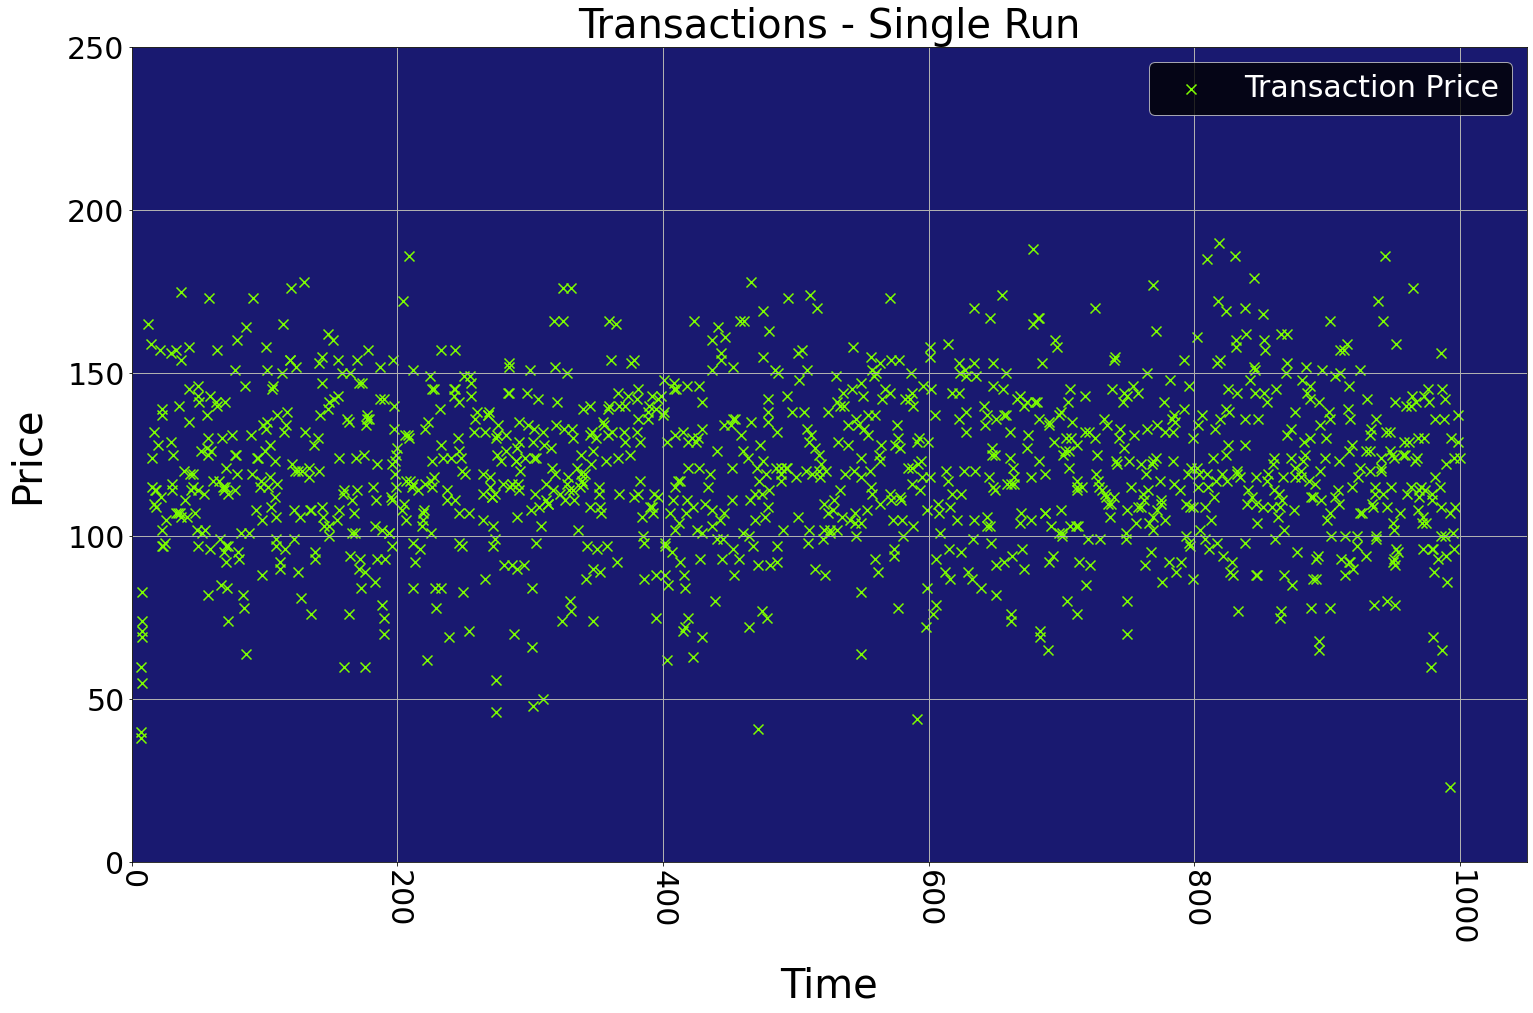

In [29]:
n_trials = 1
time_period = 225
transactions = []

# go through csv, add all data to transactions list

with open('baseline_transactions_single.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    previous_time = 0
    trial_count = 0
    for row in readCSV:
        if float(row[0]) >= previous_time:
            transactions.append([((trial_count * time_period) + float(row[0])), float(row[1])])
        else:
            trial_count += 1
        previous_time = float(row[0])

time = np.array(transactions)[:,0]
price = np.array(transactions)[:,1]

# figure parameters
print("Number of transactions:",len(price))
plt.figure(1, figsize=(25,15))
xlabel('Time', fontsize=40, labelpad=20)
ylabel('Price', fontsize=40, labelpad=20)
title("Transactions - Single Run", fontsize=40)
label='Transaction Price'

# plot data 
p1 = scatter(time, price, marker='x', color='lawngreen', s=100, label=label)

# plot equilib price line
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

leg = plt.legend(loc='upper right', prop={'size': 30}, facecolor='black')

for text in leg.get_texts():
    text.set_color("white")

# more figure parameters
p1 = plot()
ax = axes()
ax.set_facecolor('midnightblue')
# ylim(ymin=min(price)-20, ymax=max(price)+20)
ylim(ymin=0, ymax=250)
xlim(xmin=0, xmax=max(time)+50)
yticks(fontsize=30)
xticks(fontsize=30, rotation=270)
grid(linestyle='-', linewidth=1)

plt.savefig('Graphs/b1_single_trans.png',dpi=200,bbox_inches='tight',pad_inches=0)
plt.savefig('Graphs/b1_single_trans.pdf',dpi=200,bbox_inches='tight',pad_inches=0)

show()

This plot shows the mean transaction price and standard deviation over 50 market sessions

<ipython-input-28-b816a6293938>:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = axes()


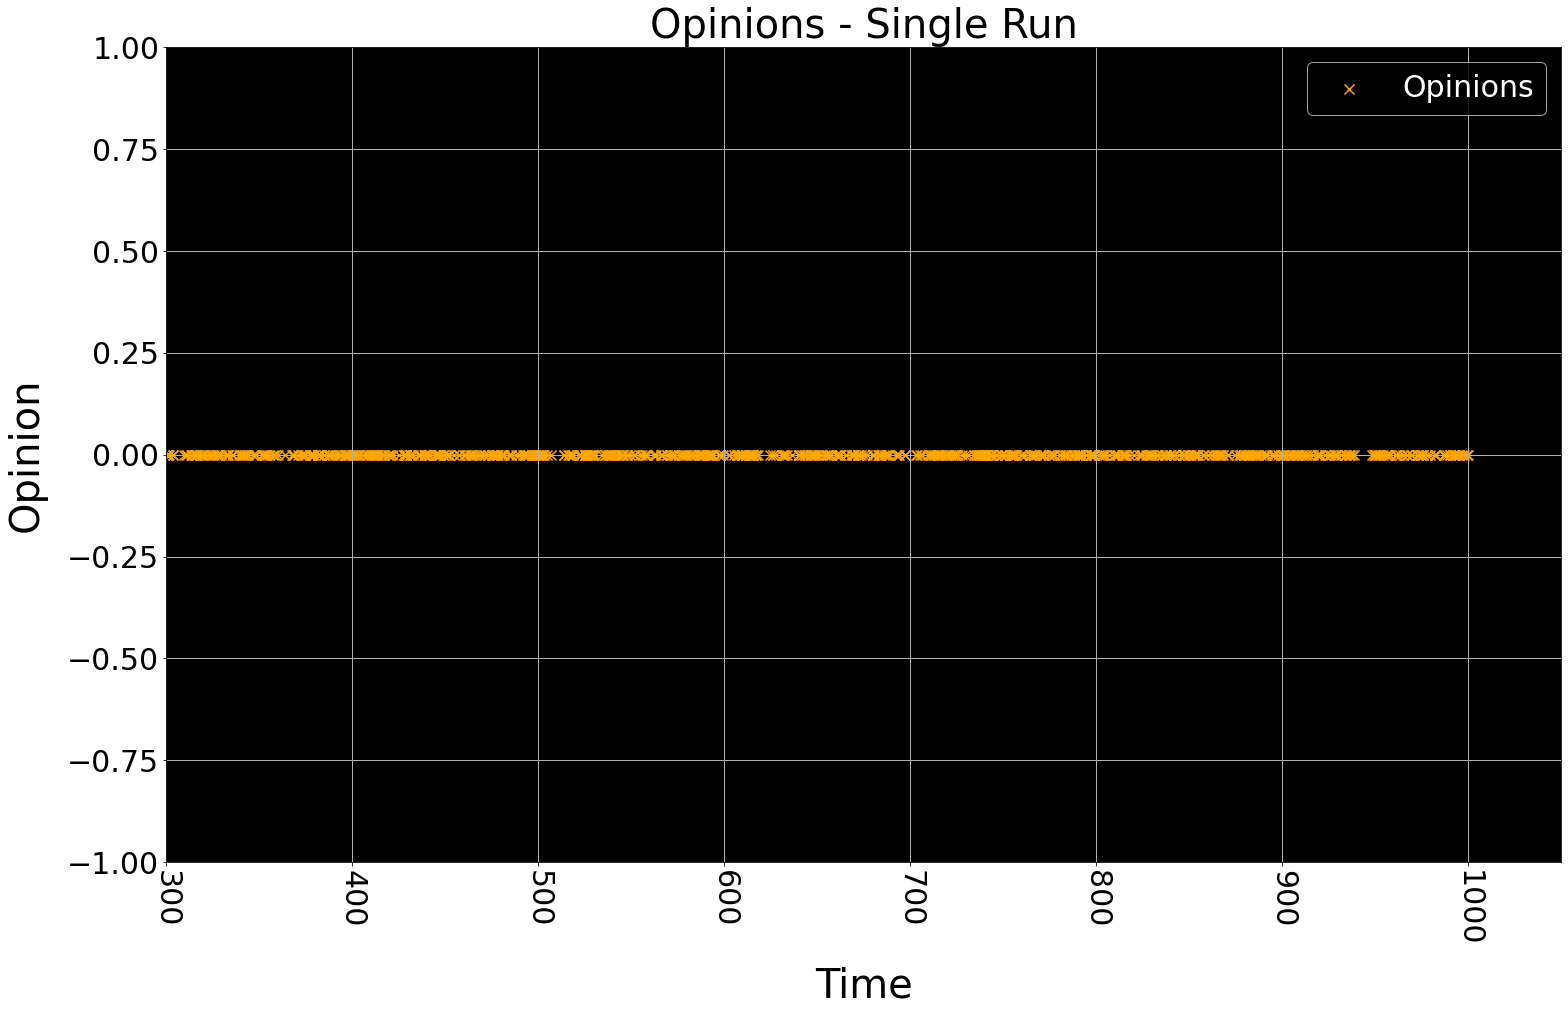

In [28]:
n_trials = 1
time_period = 225
transactions = []

# go through csv, add all data to transactions list

with open('baseline_opinions_single.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    previous_time = 0
    trial_count = 0
    for row in readCSV:
        if float(row[0]) >= previous_time:
            transactions.append([((trial_count * time_period) + float(row[0])), float(row[1])])
        else:
            trial_count += 1
        previous_time = float(row[0])

time = np.array(transactions)[:,0]
price = np.array(transactions)[:,1]

# figure parameters
plt.figure(1, figsize=(25,15))
xlabel('Time', fontsize=40, labelpad=20)
ylabel('Opinion', fontsize=40, labelpad=20)
title("Opinions - Single Run", fontsize=40)
label='Opinions'

# plot data 
p1 = scatter(time, price, marker='x', color='orange', s=100, label=label)

# plot equilib price line
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
leg = plt.legend(loc='upper right', prop={'size': 30}, facecolor='black')

for text in leg.get_texts():
    text.set_color("white")

# more figure parameters
p1 = plot()
ax = axes()
ax.set_facecolor('black')
# ylim(ymin=min(price)-20, ymax=max(price)+20)
ylim(ymin=-1, ymax=1)
xlim(xmin=300, xmax=max(time)+50)
yticks(fontsize=30)
xticks(fontsize=30, rotation=270)
grid(linestyle='-', linewidth=1)

plt.savefig('Graphs/b1_single_ops.png',dpi=200,bbox_inches='tight',pad_inches=0)
plt.savefig('Graphs/b1_single_ops.pdf',dpi=200,bbox_inches='tight',pad_inches=0)

show()

Average Number of transactions: 12474.14


<ipython-input-27-54c1c2f7476e>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = axes()


Mean of the means is 117.9116262786534


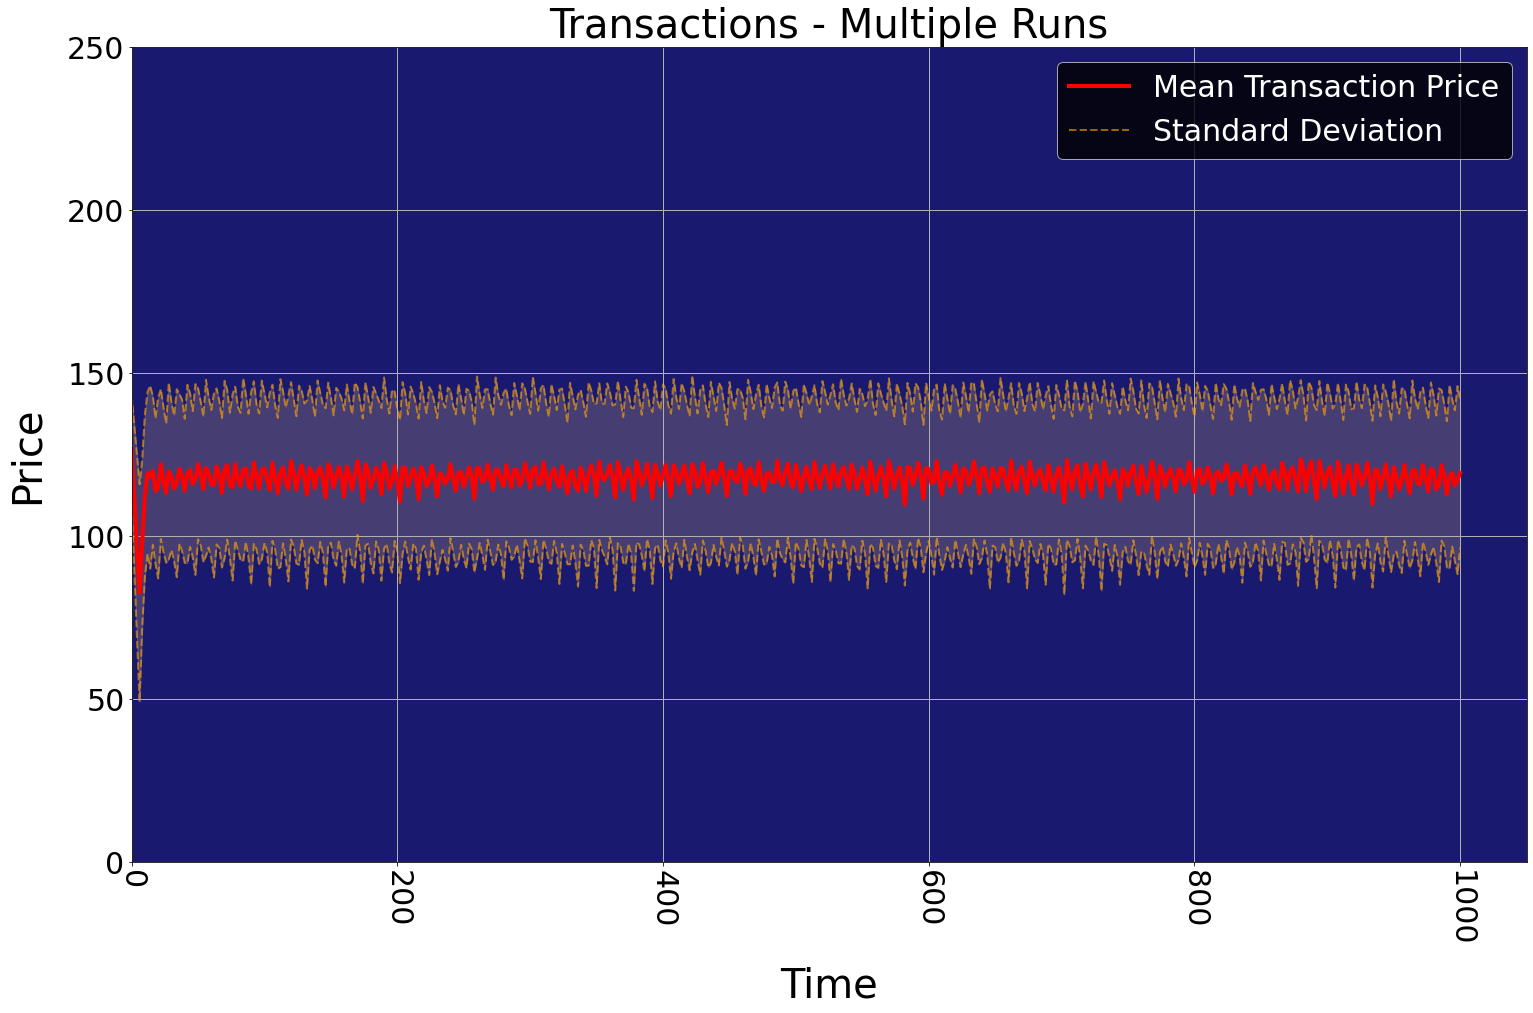

In [27]:
n_trials = 1
time_period = 225
transactions = []

# go through csv, add all data to transactions list

with open('baseline_transactions_multiple.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    previous_time = 0
    trial_count = 0
    for row in readCSV:
        time = float(row[0]) % 1000
        price = float(row[1])
        transactions.append([time,price])

time = np.array(transactions)[:,0]
price = np.array(transactions)[:,1]

# Figure parameters
print("Average Number of transactions:",len(price) / 50)
plt.figure(1, figsize=(25,15))
xlabel('Time', fontsize=40, labelpad=20)
ylabel('Price', fontsize=40, labelpad=20)
title("Transactions - Multiple Runs", fontsize=40)
label='Transaction Price'
p1 = plot()
ax = axes()
ax.set_facecolor('midnightblue')
# ylim(ymin=min(price)-20, ymax=max(price)+20)
ylim(ymin=0, ymax=250)
xlim(xmin=0, xmax=max(time)+50)
yticks(fontsize=30)
xticks(fontsize=30, rotation=270)
grid(linestyle='-', linewidth=1)

##############################################################################
# Mean line through data

# split list of continuous times into 500 bins
bins = 500
hist, bin_edges = np.histogram(time, bins=bins)

# new list for all data
modified_transactions = []


# since we need to elements of a list before and after the last bin, add a space here...
modified_transactions.append({'time': None, 'prices': []})
# ..then add space for all indexes within the first and last bin..
for i in bin_edges:
    modified_transactions.append({'time': i, 'prices': []})
# ...then add a space for time that falls outside of last bin
modified_transactions.append({'time': None, 'prices': []})

# go through original transactions list
for i in transactions:
    
    time = i[0]
    price = i[1]
    # this finds the index of the modified_transactions that this particular time value falls into 
    # i.e., if time is 20.22, and element 4 of the mod_trans list has bin edges either side of 20.2 and 20.3, then 
    # this time value belongs in element 4 of mod_trans list
    index = np.digitize(time, bin_edges)
    # once figured out where this time corresponds to in mod_trans list, add the price that corresponds to this time 
    # value to the price list in mod_trans list
    modified_transactions[index]['prices'].append(price)                          
        
mean_list = []
time_list = []
# contains data for plotting mean + std_deviataion
std_dev_pos_list = []
# contains data for plotting mean - std_deviataion
std_dev_neg_list = []
        
# loop through new mod_trans list
for i in modified_transactions:
    
    # if data, add it
    if(i['time'] is not None):
        if(len(i['prices'])>0):
            time_list.append(i['time'])
            mean = np.mean(i['prices'])
            std_dev = np.std(i['prices'])

            # calculate mean, mean+std_dev, mean-std_dev, and add to the respective lists, which we will plot
            mean_list.append(mean)
            std_dev_pos_list.append(mean+std_dev)
            std_dev_neg_list.append(mean-std_dev)


# plotting everything now...
label = "Mean Transaction Price"
p1 = plot(time_list, mean_list, color='red', lw=4.0, label=label)

label = "Standard Deviation"
p2 = plot(time_list, std_dev_pos_list, '--', color='orange', lw=2.0, label=label, alpha=0.6)
p3 = plot(time_list, std_dev_neg_list, '--', color='orange', lw=2.0, alpha=0.6)

plt.fill_between(time_list, std_dev_pos_list, std_dev_neg_list, color='#FFD580', alpha=0.2)

leg = plt.legend(loc='upper right', prop={'size': 30}, facecolor='black')
for text in leg.get_texts():
    text.set_color("white")
    
    
plt.savefig('Graphs/b1_multiple_trans.png',dpi=200,bbox_inches='tight',pad_inches=0)
plt.savefig('Graphs/b1_multiple_trans.pdf',dpi=200,bbox_inches='tight',pad_inches=0)
    
    
print("Mean of the means is {}".format(np.mean(mean_list)))
    
show()

In [7]:
def getChangeInOpinionData(filename):

    step = []
    opinions = []
    cs = []

    # a list of prices go in each time level
    mean_op_data = []

    for i in range(1000):
        mean_op_data.append([i,[]])

    # go through csv, add all data to transactions list

    with open(filename) as csv_file:
        readCSV = csv.reader(csv_file, delimiter=',')
        trial_count = 0
        time_period = 225
        for row in readCSV:
            ntime=float(row[0])
            opinion = float(row[1])
            index = int(ntime)
            mean_op_data[index][1].append(opinion)


    time_axis = np.arange(0, 1000, 1)
    mean_opinion_list = []
    std_dev_pos_list = []
    std_dev_neg_list = []

    for i in range(1000):

        std_dev = np.std(mean_op_data[i][1])
        mean = np.mean(mean_op_data[i][1])

        mean_opinion_list.append(mean)
        std_dev_pos_list.append(mean + std_dev)
        std_dev_neg_list.append(mean - std_dev)

    #######################################################

    return(time_axis, mean_opinion_list)

In [8]:
time_axis, mean_opinion_list = getChangeInOpinionData('baseline_opinions_multiple.csv')

/Users/nathantaylor/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/nathantaylor/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/nathantaylor/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nathantaylor/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nathantaylor/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


This one shows the mean of the mean with std_dev

/Users/nathantaylor/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/nathantaylor/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/nathantaylor/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nathantaylor/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nathantaylor/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-26-e0eeced3a63b>:25: MatplotlibDeprecationWarning: Add

1000


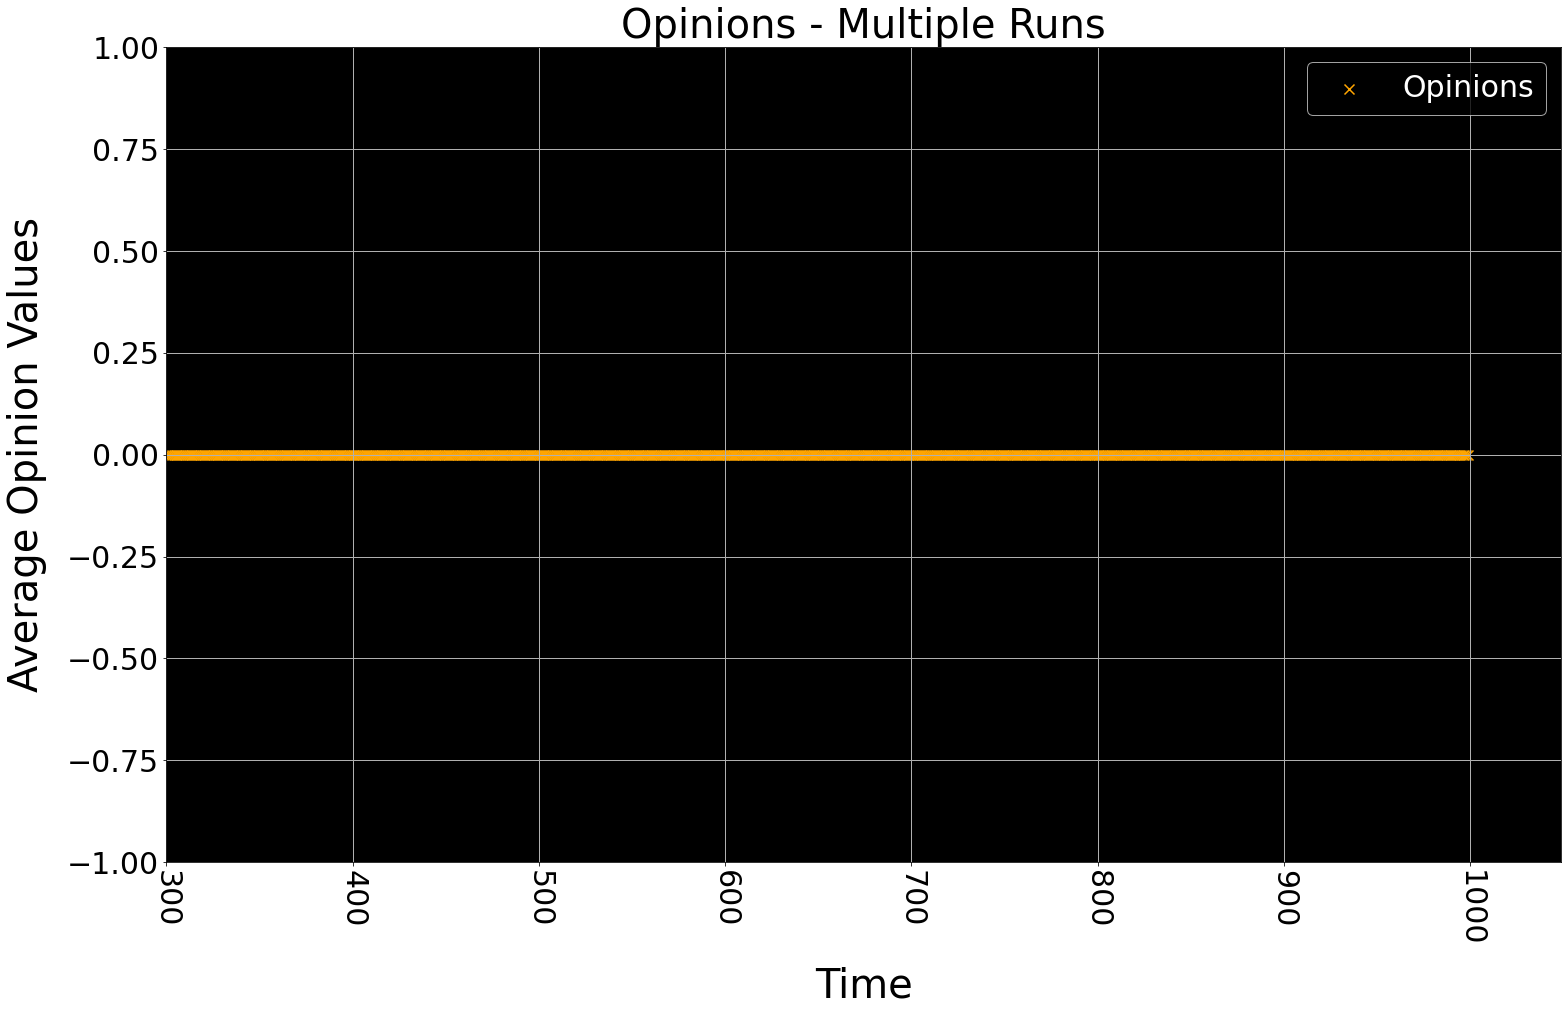

In [26]:
time_axis, mean_opinion_list = getChangeInOpinionData('baseline_opinions_multiple.csv')

print(len(mean_opinion_list))

# figure parameters
plt.figure(1, figsize=(25,15))
xlabel('Time', fontsize=40, labelpad=20)
ylabel('Average Opinion Values', fontsize=40, labelpad=20)
title("Opinions - Multiple Runs", fontsize=40)
label='Opinions'

# plot data 
p1 = scatter(time_axis, mean_opinion_list, marker='x', color='orange', s=100, label=label)

# plot equilib price line
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

leg = plt.legend(loc='upper right', prop={'size': 30}, facecolor='black')
for text in leg.get_texts():
    text.set_color("white")

# more figure parameters
p1 = plot()
ax = axes()
ax.set_facecolor('black')
# ylim(ymin=min(price)-20, ymax=max(price)+20)
ylim(ymin=-1, ymax=1)
xlim(xmin=300, xmax=max(time_axis)+50)
yticks(fontsize=30)
xticks(fontsize=30, rotation=270)
grid(linestyle='-', linewidth=1)

plt.savefig('Graphs/b1_multiple_ops.png',dpi=200,bbox_inches='tight',pad_inches=0)
plt.savefig('Graphs/b1_multiple_ops.pdf',dpi=200,bbox_inches='tight',pad_inches=0)

show()